In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt

def inference(w, b, x):        # inference, test, predict, same thing. Run model after training
    pred_y = w * x + b
    return pred_y

def eval_loss(w, b, x_list, gt_y_list):
    avg_loss = 0.0
    avg_loss = 0.5*np.sum((w*x_list + b - gt_y_list)**2) # loss function
    avg_loss /= len(gt_y_list)
    return avg_loss

def gradient(pred_y, gt_y, x):
    diff = pred_y - gt_y
    dw = diff * x
    db = diff
    return dw, db

def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b, lr):
    avg_dw, avg_db = 0, 0
    batch_size = len(batch_x_list)
    #print(bat)
    pred_y = inference(w,b,batch_x_list)    #get label data
    dw,db = gradient(pred_y,batch_gt_y_list,batch_x_list)
    avg_dw = np.sum(dw) / batch_size
    avg_db = np.sum(db) / batch_size
    w -= lr * avg_dw
    b -= lr * avg_db
    return w,b
    

def train(x_list, gt_y_list, batch_size, lr, max_iter):
    w = random.randint(0, 10) + random.random()     # for noise random.random[0, 1)。对w,b进行随机初始化
    b = random.randint(0, 5) + random.random()
    #w = 1.69529 + 3.00921    #若迭代还没达到满意精度，可在上次迭代后的全重基础上进行下一轮迭代
    #b = 3.00921
    w:1.6952902822915288,b:3.009210699400109
    num_samples = len(x_list)
    loss = []
    for i in range(max_iter):
        batch_idxs = np.random.choice(len(x_list), batch_size)   #np.range(num_samples)中产生一个size为batch_sie的随机采样
        batch_x = np.array([x_list[j] for j in batch_idxs])
        batch_y = np.array([gt_y_list[j] for j in batch_idxs])
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        print('w:{}, b:{}'.format(w, b))
        print('loss is {}'.format(eval_loss(w, b, x_list, gt_y_list)))
        loss.append(eval_loss(w, b, x_list, gt_y_list))
        
    return np.array(loss),w,b

#load data from file导入txt数据
def load_data(filename):
    dataset = []
    label = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split('\t')
        dataset.append(lineArr[:1])
        label.append(lineArr[-1])
    return np.array(dataset,dtype=np.float64),np.array(label,dtype=np.float64).reshape(-1,1)

#reshape(-1,1)表示只固定列为1列,行不知道,自动确定 同理,.reshape(2,-1)表示只确定行,列系统自动确定。


def gen_sample_data():
    w = random.randint(0, 10) + random.random()		# for noise random.random[0, 1)
    b = random.randint(0, 5) + random.random()
    num_samples = 100
    x_list = []
    y_list = []
    for i in range(num_samples):
        x = random.randint(0, 100) * random.random()
        y = w * x + b + random.random() * random.randint(-1, 1)
        x_list.append(x)
        y_list.append(y)
    return np.array(x_list), np.array(y_list), w, b


def run():
    #x_list, y_list, w, b = gen_sample_data() #由于迭代后要调整学习率与将上次迭代的w,b重新赋值，因此没用采用每次随机生成数据的gen_dample_data
    x_list,y_list = load_data('data.txt')
    lr = 0.01
    max_iter = 20000
    batch_size = 50
    loss,w,b = train(x_list, y_list, batch_size, lr, max_iter)
    iters = np.array(range(0,max_iter))  #numpy.linspace(开始，终值(含终值))，个数)
    #开始画图
    plt.title('LinearRegression_loss')   #标题
    plt.plot(iters, loss, color='red', label='lr_0.01')
    plt.legend() # 显示图例
    plt.xlabel('iteration times')
    plt.ylabel('loss')
    plt.show()
    print('w:{},b:{}'.format(w,b))



w:3.520871912287929, b:0.6323321052604709
loss is 1.2467386215835925
w:3.5267098463805984, b:0.6462442208368002
loss is 1.2229151045544489
w:3.5324395005967517, b:0.6611104659550514
loss is 1.1980517014890912
w:3.537799324202243, b:0.6759448385521254
loss is 1.1737491838096046
w:3.5430229216674993, b:0.6913084855372258
loss is 1.149077670324094
w:3.5478104200784544, b:0.7068972925930185
loss is 1.124643383661163
w:3.5533223677148094, b:0.7202011451333828
loss is 1.103310982931933
w:3.5579063753359583, b:0.7354030226149775
loss is 1.0801192615107944
w:3.562890116169646, b:0.7495883500640023
loss is 1.0584025926410665
w:3.567971301882147, b:0.7629731258414141
loss is 1.0379812204509298
w:3.5732916158569585, b:0.7760261287772012
loss is 1.0181347591233372
w:3.57787624204217, b:0.7904276250825203
loss is 0.9971328326058093
w:3.5827689974004184, b:0.8030734207585505
loss is 0.9785174724281979
w:3.5877218664447916, b:0.815650475940489
loss is 0.9601898619141196
w:3.5922773468868145, b:0.8270

w:3.041331286539412, b:2.2956991402957097
loss is 0.08223659847645831
w:3.0408508993488246, b:2.2971263156185686
loss is 0.08211679873827338
w:3.040131651379223, b:2.2981881291144775
loss is 0.0819963726618591
w:3.03917453726558, b:2.298272310073757
loss is 0.081906836699028
w:3.038184281111403, b:2.2988605865282343
loss is 0.08178768003090886
w:3.03735311808034, b:2.2996030076163723
loss is 0.0816745797210737
w:3.0363911783990374, b:2.300071655990337
loss is 0.08156444665150744
w:3.0354902648192663, b:2.300572657164309
loss is 0.08145809582496973
w:3.034080635718539, b:2.3004455461916296
loss is 0.08134021458403319
w:3.033539219176177, b:2.3011251049640227
loss is 0.08125618757024633
w:3.0323732956564324, b:2.3012935954782194
loss is 0.08114440290959597
w:3.0314795895452336, b:2.3014370408362548
loss is 0.08105813526717444
w:3.030867264736667, b:2.302192130775961
loss is 0.08096384206688464
w:3.030147923250193, b:2.3026902110695744
loss is 0.08087400634184728
w:3.0295035352726347, b:2

w:2.45582069439761, b:2.6101834897074436
loss is 0.028423130681355872
w:2.4549574656184885, b:2.6100480351853474
loss is 0.028381852511079542
w:2.4543120821864015, b:2.61023486738308
loss is 0.0283434500410784
w:2.453924335419828, b:2.6104684381823993
loss is 0.028317139779759228
w:2.4535569985246974, b:2.6107836924434427
loss is 0.02828971449902621
w:2.452790902015893, b:2.610864956575565
loss is 0.028248001579765935
w:2.452467581004133, b:2.6112817330711353
loss is 0.028220139879976944
w:2.4519666324781553, b:2.6116840216474384
loss is 0.028183561813120327
w:2.4517694789790077, b:2.6123168033228437
loss is 0.028156711857754157
w:2.451419011525218, b:2.612875971281852
loss is 0.028124051687789572
w:2.4509898051138923, b:2.6133981708826677
loss is 0.02808837990600091
w:2.4503843026998537, b:2.6136903206700355
loss is 0.028049415685447478
w:2.4500917949269017, b:2.614065781466033
loss is 0.02802469267868556
w:2.449277535514754, b:2.6140858723932885
loss is 0.027981795075807323
w:2.44857

w:2.1202241277057836, b:2.784364200951641
loss is 0.01122228374124687
w:2.119962213544273, b:2.78463006059027
loss is 0.011210601289521768
w:2.1198096094560483, b:2.784974582163011
loss is 0.011200852036370718
w:2.119489047732958, b:2.784944947915835
loss is 0.011192137443965758
w:2.1192281215351887, b:2.7852593378197685
loss is 0.011179777735601573
w:2.118834813959024, b:2.7851652125471795
loss is 0.011170020154257814
w:2.1182617904476806, b:2.7848252674336536
loss is 0.011159277469914209
w:2.1176784269899516, b:2.7844775095572
loss is 0.011148792875909247
w:2.117367230876453, b:2.7846033677407216
loss is 0.01113801887930347
w:2.116923664773777, b:2.784518025320353
loss is 0.011127235505379205
w:2.1166031153293763, b:2.7844795943172898
loss is 0.011119101898106729
w:2.116321594671206, b:2.7845535066475935
loss is 0.011110095651845753
w:2.116115325125719, b:2.7847994741563245
loss is 0.01110013570211675
w:2.1157912792922655, b:2.7846816316298786
loss is 0.01109335643542345
w:2.11546569

w:1.9393776078414855, b:2.8808805495632037
loss is 0.00596058913133754
w:1.9391666429416954, b:2.8808898412727846
loss is 0.005956919510841364
w:1.9388882623151278, b:2.880793124216059
loss is 0.005952963726678497
w:1.9386579604247596, b:2.880767892093739
loss is 0.0059492890844141085
w:1.9385287570416014, b:2.8808564210023535
loss is 0.005946398282646195
w:1.938418377270123, b:2.8809304430905414
loss is 0.005943943322055271
w:1.9383480733584133, b:2.8811397906370906
loss is 0.005941081115521036
w:1.9382561257644815, b:2.8812502511053615
loss is 0.005938655749065938
w:1.9381426234811667, b:2.881288999171996
loss is 0.005936433183145283
w:1.938047799928102, b:2.881426816490419
loss is 0.005933750545153391
w:1.9379278829912612, b:2.8816000197802953
loss is 0.005930379411723481
w:1.9377453789166912, b:2.881700547844154
loss is 0.005926512740479097
w:1.9376329559671917, b:2.8818077542656786
loss is 0.005923786695136269
w:1.9374613509300012, b:2.881805750350972
loss is 0.0059208941387589985

w:1.8395804908136328, b:2.9333018367599117
loss is 0.004284572550797413
w:1.8394125993156871, b:2.9331406016841535
loss is 0.0042835075840639844
w:1.8394291489924477, b:2.933318436746834
loss is 0.004282940064510637
w:1.8393688392901861, b:2.9334289754645506
loss is 0.004281872610465324
w:1.8392716238404019, b:2.933322520715429
loss is 0.004281300819760019
w:1.8391294217900205, b:2.933398040657922
loss is 0.004279528758096899
w:1.8390350424557091, b:2.933383743804849
loss is 0.004278620943214249
w:1.8388761033951884, b:2.9333525325063508
loss is 0.0042771326899798305
w:1.8388507645427254, b:2.933371731903544
loss is 0.004276792860198434
w:1.8388259960593931, b:2.9333889937880953
loss is 0.004276467217853304
w:1.8387242920845674, b:2.933307397489206
loss is 0.004275791710945321
w:1.8386954391554557, b:2.9334412220454693
loss is 0.00427491758068588
w:1.838722105006459, b:2.9336470898439595
loss is 0.004274328900680999
w:1.8386660045691103, b:2.933912547004561
loss is 0.004272701194970633

w:1.7773488006205944, b:2.9651858746301043
loss is 0.0036785058478536635
w:1.7773293788768354, b:2.965261365503561
loss is 0.003678206836371223
w:1.7772470403963778, b:2.965273304660114
loss is 0.003677699843144521
w:1.7771156419780598, b:2.9651819155128782
loss is 0.0036771769076925647
w:1.7769750988392494, b:2.9651134763105196
loss is 0.003676564744522543
w:1.776827640394964, b:2.9649945371244097
loss is 0.003676082319002835
w:1.7768493360102784, b:2.9651112619899345
loss is 0.0036758660627274633
w:1.7767124059020825, b:2.9650340698868614
loss is 0.003675330409789183
w:1.7765573345913728, b:2.964872835343281
loss is 0.0036749844130925325
w:1.7764799847755353, b:2.9649178214641716
loss is 0.0036744250685081204
w:1.7764369336150594, b:2.9650285893350503
loss is 0.0036738441286745765
w:1.776402266268565, b:2.9650442290828045
loss is 0.0036736080749230587
w:1.7763463138630158, b:2.9650267723591233
loss is 0.0036733609445514658
w:1.7762712471213733, b:2.9650868353411983
loss is 0.00367276

w:1.7418872114646293, b:2.983547703492486
loss is 0.003481754008195085
w:1.7418294123089717, b:2.983569857633311
loss is 0.003481533206269628
w:1.7417833624205346, b:2.983428418128708
loss is 0.003481603730455321
w:1.741897707915122, b:2.983600132096938
loss is 0.0034817135365430864
w:1.741847894020993, b:2.98361293664179
loss is 0.003481531729354063
w:1.741891630686276, b:2.983713795867242
loss is 0.0034815405644351627
w:1.7417759337956302, b:2.983596419492218
loss is 0.0034813203082970016
w:1.7416853733723994, b:2.9835822129887446
loss is 0.003481048628607375
w:1.7417563825562274, b:2.9837008140922703
loss is 0.0034811085309353327
w:1.7416155036503007, b:2.983474463641376
loss is 0.0034809981165163863
w:1.7415807146807096, b:2.983507794243099
loss is 0.0034808336094801573
w:1.7415919653308225, b:2.983609085019864
loss is 0.0034807079068803082
w:1.7415698499730239, b:2.9837192031690116
loss is 0.0034804725398492804
w:1.7416064007057417, b:2.983800953220402
loss is 0.003480478405448888

w:1.7211953242239626, b:2.9940170725285524
loss is 0.0034172973268721345
w:1.7212076628740738, b:2.993948107355128
loss is 0.0034173953054857315
w:1.721185400886593, b:2.9938452749530664
loss is 0.0034174839122221258
w:1.7212686353487885, b:2.9941173635055156
loss is 0.0034173201573656376
w:1.72129721006583, b:2.994317416575042
loss is 0.0034172018168261067
w:1.7211955412412736, b:2.9942964659764786
loss is 0.0034170316408961166
w:1.7212069283835751, b:2.994307959305973
loss is 0.003417043091224493
w:1.7211537403219153, b:2.994189928317652
loss is 0.00341705057957839
w:1.7211000521030682, b:2.9940738226453756
loss is 0.003417076125653427
w:1.7212265342610953, b:2.9942546350196677
loss is 0.0034171221998833263
w:1.7212084569295458, b:2.994334420644935
loss is 0.003417025196306669
w:1.7212505626882864, b:2.9943562339185177
loss is 0.003417086680573401
w:1.7211193467017272, b:2.9941184814338553
loss is 0.003417061566717037
w:1.7210689173716027, b:2.994025891786953
loss is 0.00341707793118

w:1.7103687719110774, b:3.00049387020192
loss is 0.003397792351206719
w:1.7104188992785767, b:3.0005485537969956
loss is 0.0033978677454811128
w:1.7104321899596993, b:3.0004461139554013
loss is 0.0033978724948677363
w:1.710417101745272, b:3.0004358610278272
loss is 0.0033978517637656513
w:1.7103796846473283, b:3.000418512811236
loss is 0.00339780196940946
w:1.7102419995154612, b:3.0002843024984136
loss is 0.0033976404283354456
w:1.7102040011665631, b:3.0001683284119824
loss is 0.003397624477438269
w:1.7101717374695768, b:3.0002500850362908
loss is 0.0033975653712511626
w:1.7101697483851723, b:3.0003918833420267
loss is 0.0033975386773601036
w:1.7100694516400867, b:3.0002126037396772
loss is 0.0033974611135994337
w:1.7100009680925967, b:3.0001359865810486
loss is 0.003397417400453479
w:1.7100185669978598, b:3.000185474717052
loss is 0.003397415627944913
w:1.7100070602594042, b:3.000248915477593
loss is 0.0033973808093486603
w:1.7100080487603335, b:3.0004286271231266
loss is 0.0033973399

w:1.7032369321351355, b:3.002364568368261
loss is 0.003391942605145773
w:1.7032050325920083, b:3.0023238093737756
loss is 0.0033920079699807683
w:1.7031159306215085, b:3.002161162466064
loss is 0.0033922933194431076
w:1.703185540714633, b:3.0022014083047672
loss is 0.0033922107224757503
w:1.7031055250656686, b:3.0020718186173143
loss is 0.0033924586006404533
w:1.7030879392800253, b:3.0020704277736536
loss is 0.0033924656453071926
w:1.7031938516200587, b:3.0022449456942275
loss is 0.0033921364191293168
w:1.7031472217618862, b:3.002183628210103
loss is 0.003392247841898659
w:1.7031873467887049, b:3.0024415480115043
loss is 0.0033918307074315944
w:1.703228138052152, b:3.0025296790093368
loss is 0.003391706125327532
w:1.703213047144008, b:3.0025440156553325
loss is 0.0033916865445894717
w:1.7032655334031888, b:3.0026502959066987
loss is 0.003391553148056575
w:1.7033512794288423, b:3.002731687242655
loss is 0.0033914695377743097
w:1.7034142068904667, b:3.0027787195723885
loss is 0.003391431

w:1.7003113677280361, b:3.004940469765852
loss is 0.0033892521734628245
w:1.700264848945752, b:3.0047809829911816
loss is 0.00338931585911854
w:1.7002329253855077, b:3.0047214116210608
loss is 0.00338934650961223
w:1.7002938800521312, b:3.004740902032977
loss is 0.003389342700122455
w:1.7002257735746964, b:3.004642323536815
loss is 0.0033893984566503877
w:1.7002611269527532, b:3.004704983386773
loss is 0.0033893600291575003
w:1.7001658593710613, b:3.004627994756923
loss is 0.003389405274997972
w:1.7002019297328403, b:3.004732852100992
loss is 0.003389335867931576
w:1.700265063589643, b:3.0048902260285804
loss is 0.003389261909191381
w:1.7002292469177607, b:3.004817976522174
loss is 0.0033892903189068914
w:1.7002169873193238, b:3.0047837315159165
loss is 0.003389307291881666
w:1.7001533519886862, b:3.0046891566125478
loss is 0.003389360322674041
w:1.7002319932751002, b:3.0048231036075546
loss is 0.003389288067315196
w:1.7002015144826839, b:3.0047840096396854
loss is 0.003389305006950888

w:1.699901248061873, b:3.0065289329081666
loss is 0.003389539177078292
w:1.6998243807745395, b:3.0063920952436205
loss is 0.003389346456052056
w:1.6998651256954365, b:3.0064429151197385
loss is 0.003389424595920526
w:1.6999273344869716, b:3.0064913730317135
loss is 0.0033895243572180235
w:1.699967393009238, b:3.006564762498698
loss is 0.003389637139232826
w:1.6998256058878216, b:3.0063515344309817
loss is 0.003389313871565142
w:1.6998081682495267, b:3.006297052540081
loss is 0.0033892583143580236
w:1.699892371179857, b:3.0064327993105113
loss is 0.003389438127009059
w:1.6999493665568037, b:3.0065167866010185
loss is 0.003389569747311095
w:1.6999191693605518, b:3.006403967183892
loss is 0.003389434235177013
w:1.699909440578904, b:3.0063695234385883
loss is 0.003389395706161559
w:1.6998097117456858, b:3.0062698258197345
loss is 0.003389239555287037
w:1.6997913911394118, b:3.0063536446984247
loss is 0.003389289090097679
w:1.6997083809797051, b:3.0062463746310883
loss is 0.0033891514854585

w:1.698709734025498, b:3.0064052093379243
loss is 0.0033886621340163516
w:1.6987206460362898, b:3.0064024345644067
loss is 0.003388666105091156
w:1.6986813989138971, b:3.0063137293899564
loss is 0.0033886262442235316
w:1.6986969839636854, b:3.006370479176969
loss is 0.0033886463519718756
w:1.6988418019981528, b:3.006648533752738
loss is 0.00338884570455126
w:1.698757648878588, b:3.006532533601359
loss is 0.0033887350690935303
w:1.6989403547613438, b:3.006764873736207
loss is 0.00338899184561004
w:1.6989095428842065, b:3.006789582120388
loss is 0.003388990031182162
w:1.6987990521663552, b:3.0066920415270713
loss is 0.0033888473102038586
w:1.698695782685334, b:3.0065463376397337
loss is 0.0033887095652116433
w:1.6986333143261925, b:3.0064746550065222
loss is 0.0033886509492301415
w:1.6986057561012287, b:3.006436525533773
loss is 0.003388626565598706
w:1.6986658393090646, b:3.0065339715549917
loss is 0.003388689191572044
w:1.6987336170062168, b:3.0066438516167504
loss is 0.003388779476340

w:1.6973695038925907, b:3.007050909930404
loss is 0.0033883484835913642
w:1.6973818108423084, b:3.0070832768917977
loss is 0.0033883631664291536
w:1.6973194592052352, b:3.006990981673349
loss is 0.003388317486195955
w:1.6971436557652317, b:3.0067273760625888
loss is 0.0033882720223864186
w:1.697211763221284, b:3.006778808706284
loss is 0.00338827567250448
w:1.6971556857310273, b:3.006669443941129
loss is 0.0033882818459366358
w:1.697098332931627, b:3.006557051520797
loss is 0.0033883079527176796
w:1.697163527176268, b:3.0066331020602357
loss is 0.0033882894139064456
w:1.6972023852398026, b:3.006628696452456
loss is 0.0033882926153623117
w:1.6971587576250267, b:3.0065839669872765
loss is 0.003388300858502322
w:1.6970243143891814, b:3.0063882043816097
loss is 0.0033883833842331536
w:1.697095048079218, b:3.0065590232794044
loss is 0.003388307337876066
w:1.6970828153970032, b:3.0065141687323846
loss is 0.0033883229843874297
w:1.697139881345082, b:3.0066858224933974
loss is 0.00338827787290

w:1.696755908532915, b:3.0080552280680357
loss is 0.0033887220863201978
w:1.6968082500687975, b:3.0081443664382803
loss is 0.00338885124712379
w:1.6966475674310693, b:3.007926183544567
loss is 0.003388541770149753
w:1.6966227242765919, b:3.008034217338618
loss is 0.0033886231771453547
w:1.6966100370378925, b:3.0080189066797796
loss is 0.0033886020958287444
w:1.6966040665272455, b:3.0079787941268847
loss is 0.003388563455254644
w:1.6965615686550888, b:3.007971658920486
loss is 0.003388535251647897
w:1.6965230333897943, b:3.0079016911922514
loss is 0.003388461185257148
w:1.6964693716251433, b:3.00779018722398
loss is 0.003388362748718663
w:1.6964261385862311, b:3.0078481896461806
loss is 0.003388381665710153
w:1.6963708723948567, b:3.007715124782498
loss is 0.003388286353861174
w:1.696325890936052, b:3.007714772420783
loss is 0.003388271866982388
w:1.6962637746537745, b:3.007565985288397
loss is 0.0033882000996335654
w:1.6963776176456657, b:3.0077464515109495
loss is 0.003388304306780533

w:1.695816463715249, b:3.006157228382629
loss is 0.003389037178069737
w:1.6958933188984666, b:3.0063297803646383
loss is 0.003388780205832129
w:1.6959560487769005, b:3.0064278756248797
loss is 0.0033886456377971936
w:1.6960516213421428, b:3.006505707280698
loss is 0.003388533691125441
w:1.6960866501102918, b:3.006568242736071
loss is 0.0033884688874072787
w:1.6961403251451257, b:3.006638086270523
loss is 0.003388400097790087
w:1.696139391866101, b:3.0065595274383536
loss is 0.0033884589276464393
w:1.6960216914805413, b:3.0063201715180785
loss is 0.003388728341073046
w:1.6960044513215384, b:3.006171597419203
loss is 0.0033889094683390397
w:1.695933700367477, b:3.006156570145308
loss is 0.0033889682023442898
w:1.6960201211000787, b:3.0063277064305507
loss is 0.00338872094928497
w:1.695918997094078, b:3.0061928871578734
loss is 0.0033889303322662523
w:1.695855044361785, b:3.0061734693070785
loss is 0.0033889923049194694
w:1.6958331058263474, b:3.006115994809894
loss is 0.00338908296401031

w:1.6954176062832509, b:3.007630704816754
loss is 0.0033881250078905524
w:1.6955537943529444, b:3.00784315849118
loss is 0.0033881473564039044
w:1.6955701611897347, b:3.007863869675232
loss is 0.003388154210781843
w:1.6955419865179127, b:3.007769050408849
loss is 0.0033881333223138455
w:1.695518996613167, b:3.0078073640478302
loss is 0.003388136881715905
w:1.6955546038426392, b:3.0078580663275996
loss is 0.0033881507459562177
w:1.6956233943362984, b:3.0079119575118094
loss is 0.0033881760918009923
w:1.6956276247732607, b:3.007974837884233
loss is 0.0033881988060938256
w:1.695653441057647, b:3.008026197918235
loss is 0.0033882258938012218
w:1.6956431485930397, b:3.00815378751903
loss is 0.003388287597523413
w:1.6955341039473044, b:3.0079836398950404
loss is 0.0033881833952539475
w:1.69548519487084, b:3.007900492238874
loss is 0.003388151559631626
w:1.6955484018202052, b:3.008020207797981
loss is 0.003388199576871186
w:1.6955396089928876, b:3.0080051826923326
loss is 0.003388192116809780

w:1.694849016189747, b:3.007342117181995
loss is 0.0033883319780690204
w:1.6948445121895828, b:3.0073015464421937
loss is 0.0033883601236095327
w:1.694985110053033, b:3.0074912953761785
loss is 0.0033882141459682354
w:1.694994412986361, b:3.0075505861142817
loss is 0.0033881893152601715
w:1.694887026700373, b:3.0074167351673204
loss is 0.0033882759170129205
w:1.6948524667294227, b:3.007422619612292
loss is 0.0033882832410127607
w:1.6948555563598708, b:3.007427784039354
loss is 0.003388279467981322
w:1.6949810166794272, b:3.007618120614147
loss is 0.0033881700321330725
w:1.6950193257225423, b:3.007716602619479
loss is 0.0033881416317752744
w:1.6949930223071827, b:3.00765055235733
loss is 0.0033881592416655
w:1.694977195709034, b:3.0074918197075586
loss is 0.0033882157744961005
w:1.6948455093510433, b:3.00730711821597
loss is 0.0033883560106295956
w:1.694740320287312, b:3.0071582923861317
loss is 0.00338851475779812
w:1.6947340185210518, b:3.0070653653690558
loss is 0.003388603138184837


w:1.6953597723097658, b:3.00748841119765
loss is 0.0033881505055727225
w:1.695340690077089, b:3.0073683065880092
loss is 0.0033881894695493085
w:1.695349021799597, b:3.0073362664500114
loss is 0.0033882001174455945
w:1.6954044958449412, b:3.0074610871238123
loss is 0.003388152045913609
w:1.6952865071911425, b:3.0072851458010907
loss is 0.0033882356533038883
w:1.6953349780136255, b:3.007319994433529
loss is 0.003388209476995867
w:1.6952099542910561, b:3.0072202917938595
loss is 0.0033882900035794796
w:1.6951669216948173, b:3.0070831502351996
loss is 0.003388394412838819
w:1.6951786307296595, b:3.007195145907758
loss is 0.0033883145389755356
w:1.6951144518129426, b:3.0071852612032295
loss is 0.0033883418477299145
w:1.695025569414568, b:3.0070679294460665
loss is 0.003388462710072111
w:1.694979844481186, b:3.0069898650982507
loss is 0.003388551358250327
w:1.694939089482584, b:3.0070024141571396
loss is 0.003388559419019116
w:1.69501369217325, b:3.0071050527178085
loss is 0.003388437811064

w:1.695741038338098, b:3.0076072960705242
loss is 0.0033881322444668416
w:1.6957854792201992, b:3.0076466332002765
loss is 0.00338813995235456
w:1.6956827604860123, b:3.007535034363022
loss is 0.003388128493703542
w:1.6955862718717565, b:3.007326283145133
loss is 0.0033881669362896636
w:1.695692900361705, b:3.007466003928546
loss is 0.0033881329359203307
w:1.69568196511181, b:3.0072911595009555
loss is 0.003388166203636863
w:1.6957339393343986, b:3.0073003138492855
loss is 0.003388158957120384
w:1.6958886959735708, b:3.0075648707004383
loss is 0.0033881409196282364
w:1.69592526392099, b:3.007644326481255
loss is 0.0033881570202534384
w:1.6959006599726867, b:3.007513327032114
loss is 0.0033881380673589233
w:1.6959170109670583, b:3.0074898780907504
loss is 0.003388138195807045
w:1.6958740828088872, b:3.0075322722427194
loss is 0.0033881371160157316
w:1.6957551882901019, b:3.007250973547359
loss is 0.0033881699140957105
w:1.6957571034526662, b:3.0073474043600017
loss is 0.0033881473609496

w:1.69539887462186, b:3.0065106617644277
loss is 0.0033888371134673206
w:1.6953877524746284, b:3.00650972544023
loss is 0.003388844678016224
w:1.695509520902107, b:3.0067103921103877
loss is 0.0033885672201722657
w:1.6954845008639665, b:3.006676326516936
loss is 0.0033886114986862526
w:1.6953892041305445, b:3.006490515065252
loss is 0.0033888670909103503
w:1.6954919859251945, b:3.00662265068748
loss is 0.0033886622696525644
w:1.695562250945622, b:3.006784548557599
loss is 0.0033884791007716937
w:1.6955815460583696, b:3.0066897032056406
loss is 0.0033885550592444246
w:1.6955505442978656, b:3.0066469801116096
loss is 0.0033886097330945164
w:1.6955913825664302, b:3.0066299018543123
loss is 0.0033886077822168413
w:1.6955407855337594, b:3.006406794567068
loss is 0.0033888808167484236
w:1.6956153629418318, b:3.0065201683214533
loss is 0.003388709430600331
w:1.6957238118129003, b:3.0067079229491966
loss is 0.003388481614178881
w:1.6957095560623716, b:3.0067080914576905
loss is 0.0033884868596

w:1.6956665576672143, b:3.0063146828958924
loss is 0.003388922057682436
w:1.6956885876979377, b:3.0064009974064416
loss is 0.003388805066191629
w:1.6958220791520573, b:3.006554670656626
loss is 0.0033885792952189093
w:1.6957376030920328, b:3.00634881161751
loss is 0.0033888399700937578
w:1.695799144898526, b:3.006505783158867
loss is 0.0033886369077757773
w:1.6958998809492518, b:3.006586400689524
loss is 0.0033885194366674158
w:1.6958918454606915, b:3.0065787715675807
loss is 0.0033885292185407722
w:1.6958439860722405, b:3.0064765152188553
loss is 0.003388646251438126
w:1.6959059737991478, b:3.0065309494094032
loss is 0.0033885670298544634
w:1.6959484097425739, b:3.0066174108389223
loss is 0.0033884755584291104
w:1.6959160978282228, b:3.006578304487549
loss is 0.003388520402216375
w:1.6959198368443533, b:3.006662368177172
loss is 0.0033884491156329164
w:1.69621132120854, b:3.0069960032938163
loss is 0.0033882052204119856
w:1.6962688794041911, b:3.0070085383472547
loss is 0.003388197823

w:1.6956720515145898, b:3.0072297203916696
loss is 0.003388186434221725
w:1.695722991767189, b:3.0073265626605616
loss is 0.003388153736088168
w:1.6957245530170872, b:3.007364702667538
loss is 0.0033881459419533464
w:1.6957518962019487, b:3.0073916629325432
loss is 0.003388140376792434
w:1.6958351811667716, b:3.0075259275823876
loss is 0.0033881341923595355
w:1.6958462832008216, b:3.007497103357311
loss is 0.0033881341856644566
w:1.6958752544816498, b:3.007520546104761
loss is 0.0033881365830185674
w:1.6959275279942971, b:3.0076592184306676
loss is 0.00338816039021398
w:1.6959592043386398, b:3.0077306796246774
loss is 0.0033881842206076127
w:1.695952773063794, b:3.0076792876048084
loss is 0.003388169093357645
w:1.6959243209959327, b:3.0076860211738157
loss is 0.0033881658774457847
w:1.6958323452672472, b:3.0076411539637316
loss is 0.0033881443021800068
w:1.6957735883265959, b:3.007630564847635
loss is 0.0033881368969642233
w:1.69580904912571, b:3.007617100119429
loss is 0.0033881387375

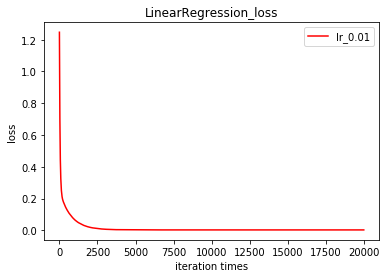

w:1.6952902822915288,b:3.009210699400109


<Figure size 432x288 with 0 Axes>

In [23]:

if __name__ == '__main__':	# 跑.py的时候，跑main下面的；被导入当模块时，main下面不跑，其他当函数调
    run()

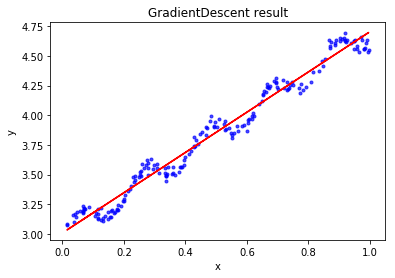

In [16]:
#现在可视化一下求得w效果
x,y = load_data('data.txt')
plt.title('GradientDescent result')
plt.scatter(x,y,marker='.',color='b',alpha=0.7)
predict_y = x*1.69529 + 3.00921
plt.plot(x[:,0],predict_y,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
#验证
#简单的线性回归，使用正规方程就可以求得w的最优值

def load_data(filename):
    dataset = []
    label = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split('\t')
        dataset.append(lineArr[:1])
        label.append(lineArr[-1])
    return np.array(dataset,dtype=np.float64),np.array(label,dtype=np.float64).reshape(-1,1)

def normalEquation(X_train,y_train):
    w = np.zeros((X_train.shape[0],1))
    # print(w.shape) 结果为（200，1）元素全为0的矩阵
    #这里用伪逆，所以不用判断矩阵的逆不存在
    w = (np.linalg.pinv(X_train.T.dot(X_train))).dot(X_train.T).dot(y_train)
    #求广义逆矩阵：np.linalg.pinv(A),即w=(x^T*x)^(-1)*x^T*y这里的w就是theta
    return w

X_train,y_train = load_data('data.txt')
X_train = np.column_stack((np.ones((len(X_train), 1)), X_train))
w = normalEquation(X_train,y_train)
print(w)
#用梯度下降预测出的b为3.00921，w为1.69529

[[3.00774323]
 [1.69532267]]


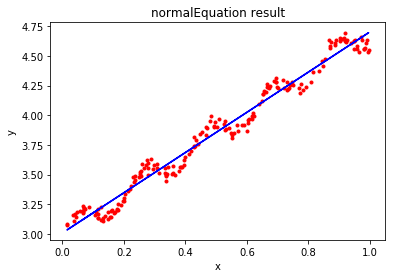

In [14]:
h = w[1]*X_train[:,1] + w[0]   #注意在normalEquation时，将X_train添加了一列为1的列
plt.title('normalEquation result')
plt.scatter(X_train[:,1],y_train,marker='.',color = 'r')
plt.plot(X_train[:,1],h,color = "blue",linestyle = "-")
plt.xlabel('x')
plt.ylabel('y')
plt.show()